# Data Preparation and Feature Engineering

# 1. Encoding

- Data: Tips
- Target: Tip
- Preprocess: 
    1. One Hot Encoding: Sex, Smoker, Time
    2. Binary Encoding: Day
    3. Robust Scaler: Total Bill
    4. No Treatment: Size
- Random state 10, Data splitting 70:30 model Ridge Default

In [19]:
!pip install category_encoders

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from sklearn.compose import ColumnTransformer # mempermudah preprocessing, semua kolom digabungkan dengan ini

from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error



## 1.1 Data

In [3]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## 1.2 One Hot Encoding

In [4]:
onehot = OneHotEncoder()
transformer = ColumnTransformer([
    
    ('one hot', onehot, ['sex', 'smoker', 'time'])
]) ## MEMBUAT DUMMY PADA VARIABLE YANG DI INGINKAN

In [5]:
tips_encoded = pd.DataFrame(transformer.fit_transform(tips)) # VARIABLE
tips_encoded.columns = transformer.get_feature_names() # NAMA COLUMNS
tips_encoded

,one hot__x0_Female,one hot__x0_Male,one hot__x1_No,one hot__x1_Yes,one hot__x2_Dinner,one hot__x2_Lunch
0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...
239,0.0,1.0,1.0,0.0,1.0,0.0
240,1.0,0.0,0.0,1.0,1.0,0.0
241,0.0,1.0,0.0,1.0,1.0,0.0
242,0.0,1.0,1.0,0.0,1.0,0.0


## 1.3 Binary Encoder

In [6]:
binary_encoder = ce.BinaryEncoder()

transformer= ColumnTransformer([
    ('binary encoding', binary_encoder, ['day'])
])

In [7]:
df_binary = pd.DataFrame(transformer.fit_transform(tips))

df_binary['day'] = tips['day']
df_binary.drop_duplicates()

C:\Users\dheof\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,0,1,2,day
0,0,0,1,Sun
19,0,1,0,Sat
77,0,1,1,Thur
90,1,0,0,Fri


## 1.4 Preprocessing Scheme

In [8]:
onehot = OneHotEncoder(drop = 'first') # K-1 DUMMY = untuk linear model: regresi, regresi logistik
# onehot = OneHotEncoder() # K DUMMY = UNTUK TREE, RANDOM FOREST, KNN, BOOSTING.

transformer = ColumnTransformer(
    [
    ('one hot', onehot, ['sex', 'smoker', 'time']),
    ('binary encoding', binary_encoder, ['day']),
    ('robust scaler', RobustScaler(), ['total_bill'])
    ],
remainder = 'passthrough')

## 1.5 Data Splitting

In [9]:
var = ['sex', 'smoker', 'time', 'day', 'total_bill', 'size']
x = tips[var]
y = tips['tip']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    random_state = 10
)

## 1.6 Preprocess Fitting

In [11]:
x_train

,sex,smoker,time,day,total_bill,size
58,Male,Yes,Dinner,Sat,11.24,2
1,Male,No,Dinner,Sun,10.34,3
2,Male,No,Dinner,Sun,21.01,3
68,Male,No,Dinner,Sat,20.23,2
184,Male,Yes,Dinner,Sun,40.55,2
...,...,...,...,...,...,...
64,Male,No,Dinner,Sat,17.59,3
15,Male,No,Dinner,Sun,21.58,2
228,Male,No,Dinner,Sat,13.28,2
125,Female,No,Lunch,Thur,29.80,6


In [12]:
x_train_preprocess = transformer.fit_transform(x_train)
x_test_preprocess = transformer.fit_transform(x_test)

C:\Users\dheof\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\dheof\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [13]:
x_train_preprocess = pd.DataFrame(x_train_preprocess)
x_test_preprocess = pd.DataFrame(x_test_preprocess)

In [14]:
x_train_preprocess

,0,1,2,3,4,5,6,7
0,1.0,1.0,0.0,0.0,0.0,1.0,-0.566396,2.0
1,1.0,0.0,0.0,0.0,1.0,0.0,-0.647696,3.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.316170,3.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.245709,2.0
4,1.0,1.0,0.0,0.0,1.0,0.0,2.081301,2.0
...,...,...,...,...,...,...,...,...
178,1.0,0.0,0.0,0.0,0.0,1.0,0.007227,3.0
179,1.0,0.0,0.0,0.0,1.0,0.0,0.367660,2.0
180,1.0,0.0,0.0,0.0,0.0,1.0,-0.382114,2.0
181,0.0,0.0,1.0,0.0,1.0,1.0,1.110208,6.0


In [15]:
pd.DataFrame(transformer.fit_transform(tips))

C:\Users\dheof\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,0,1,2,3,4,5,6,7,8
0,0.0,0.0,0.0,0.0,0.0,1.0,-0.074675,1.01,2.0
1,1.0,0.0,0.0,0.0,0.0,1.0,-0.691558,1.66,3.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.298237,3.50,3.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.545918,3.31,2.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.630334,3.61,4.0
...,...,...,...,...,...,...,...,...,...
239,1.0,0.0,0.0,0.0,1.0,0.0,1.042208,5.92,3.0
240,0.0,1.0,0.0,0.0,1.0,0.0,0.870594,2.00,2.0
241,1.0,1.0,0.0,0.0,1.0,0.0,0.452226,2.00,2.0
242,1.0,0.0,0.0,0.0,1.0,0.0,0.002319,1.75,2.0


In [16]:
transformer.transformers_[0][1].get_feature_names() ## MENDAPATKAN NAMA VARIABLE

array(['x0_Male', 'x1_Yes', 'x2_Lunch'], dtype=object)

In [17]:
transformer.transformers_[1][1].get_feature_names()

['day_0', 'day_1', 'day_2']

In [18]:
feature_names = list(transformer.transformers_[0][1].get_feature_names()) + list(transformer.transformers_[1][1].get_feature_names()) + ['total_bill', 'size']
x_train_preprocess.columns = feature_names
x_test_preprocess.columns = feature_names

In [19]:
x_train_preprocess

,x0_Male,x1_Yes,x2_Lunch,day_0,day_1,day_2,total_bill,size
0,1.0,1.0,0.0,0.0,0.0,1.0,-0.566396,2.0
1,1.0,0.0,0.0,0.0,1.0,0.0,-0.647696,3.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.316170,3.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.245709,2.0
4,1.0,1.0,0.0,0.0,1.0,0.0,2.081301,2.0
...,...,...,...,...,...,...,...,...
178,1.0,0.0,0.0,0.0,0.0,1.0,0.007227,3.0
179,1.0,0.0,0.0,0.0,1.0,0.0,0.367660,2.0
180,1.0,0.0,0.0,0.0,0.0,1.0,-0.382114,2.0
181,0.0,0.0,1.0,0.0,1.0,1.0,1.110208,6.0


K kategori --> dummy k-1

## 1.7 Modeling

In [20]:
model = Ridge()
model.fit(x_train_preprocess, y_train)

Ridge()

In [21]:
y_pred = model.predict(x_test_preprocess)
mean_squared_error(y_test, y_pred)

1.0846156956704367

## 1.8 Coef

In [22]:
feature_names

['x0_Male',
 'x1_Yes',
 'x2_Lunch',
 'day_0',
 'day_1',
 'day_2',
 'total_bill',
 'size']

In [23]:
model.coef_

array([-0.21994306, -0.07107905,  0.11693755,  0.03169306, -0.00246008,
       -0.0613861 ,  1.08614386,  0.1728903 ])

In [24]:
pd.DataFrame({
    'var': feature_names,
    'coef': model.coef_
})

,var,coef
0,x0_Male,-0.219943
1,x1_Yes,-0.071079
2,x2_Lunch,0.116938
3,day_0,0.031693
4,day_1,-0.002460
5,day_2,-0.061386
6,total_bill,1.086144
7,size,0.172890


# 2. Missing Value

In [25]:
import pandas as pd
import numpy as np

In [26]:
df = pd.DataFrame({
    'x1': [4,6,7,np.nan,2,1],
    'x2': [1,4,6,8,np.nan,1],
    'x3': [11,12,13,16,18,20],
    'x4': ['A', 'A', np.nan, 'C', 'C', 'D'],
    'x5': ['X', 'X', 'Y', np.nan, 'X', 'Y'],
    'x6': ['M', 'M', np.nan, np.nan, 'N', 'N']
})

In [27]:
df

,x1,x2,x3,x4,x5,x6
0,4.0,1.0,11,A,X,M
1,6.0,4.0,12,A,X,M
2,7.0,6.0,13,NaN,Y,NaN
3,NaN,8.0,16,C,NaN,NaN
4,2.0,NaN,18,C,X,N
5,1.0,1.0,20,D,Y,N


## 2.1 Pengisian Missing Value dengan Mean atau median
### Untuk variabel Numerik

In [28]:
from sklearn.impute import SimpleImputer

In [29]:
simple_impute = SimpleImputer(strategy='mean')
df[['x1', 'x2']] = simple_impute.fit_transform(df[['x1', 'x2']])
df

,x1,x2,x3,x4,x5,x6
0,4.0,1.0,11,A,X,M
1,6.0,4.0,12,A,X,M
2,7.0,6.0,13,NaN,Y,NaN
3,4.0,8.0,16,C,NaN,NaN
4,2.0,4.0,18,C,X,N
5,1.0,1.0,20,D,Y,N


## 2.2 Pengisian Missing Value dengan Mode (Modus)
### Untuk variabel Kategorik

In [30]:
df = pd.DataFrame({
    'x1': [4,6,7,np.nan,2,1],
    'x2': [1,4,6,8,np.nan,1],
    'x3': [11,12,13,16,18,20],
    'x4': ['C', 'C', np.nan, 'A', 'A', 'D'],
    'x5': ['X', 'X', 'Y', np.nan, 'X', 'Y'],
    'x6': ['M', 'M', np.nan, np.nan, 'N', 'N']
})

In [31]:
simple_impute = SimpleImputer(strategy='most_frequent')
df[['x4', 'x5']] = simple_impute.fit_transform(df[['x4', 'x5']])
df

,x1,x2,x3,x4,x5,x6
0,4.0,1.0,11,C,X,M
1,6.0,4.0,12,C,X,M
2,7.0,6.0,13,A,Y,NaN
3,NaN,8.0,16,A,X,NaN
4,2.0,NaN,18,A,X,N
5,1.0,1.0,20,D,Y,N


## 2.3 Pengisian Missing Value dengan Constant
### Untuk numerik maupun kategorikal

In [32]:
df = pd.DataFrame({
    'x1': [4,6,7,np.nan,2,1],
    'x2': [1,4,6,8,np.nan,1],
    'x3': [11,12,13,16,18,20],
    'x4': ['C', 'C', np.nan, 'A', 'A', 'D'],
    'x5': ['X', 'X', 'Y', np.nan, 'X', 'Y'],
    'x6': ['M', 'M', np.nan, np.nan, 'N', 'N']
})

In [33]:
simple_impute = SimpleImputer(strategy='constant', fill_value=5)
df[['x1', 'x2']] = simple_impute.fit_transform(df[['x1', 'x2']])
df

,x1,x2,x3,x4,x5,x6
0,4.0,1.0,11,C,X,M
1,6.0,4.0,12,C,X,M
2,7.0,6.0,13,NaN,Y,NaN
3,5.0,8.0,16,A,NaN,NaN
4,2.0,5.0,18,A,X,N
5,1.0,1.0,20,D,Y,N


In [34]:
simple_impute = SimpleImputer(strategy='constant', fill_value='P')
df[['x4', 'x5', 'x6']] = simple_impute.fit_transform(df[['x4', 'x5', 'x6']])
df

,x1,x2,x3,x4,x5,x6
0,4.0,1.0,11,C,X,M
1,6.0,4.0,12,C,X,M
2,7.0,6.0,13,P,Y,P
3,5.0,8.0,16,A,P,P
4,2.0,5.0,18,A,X,N
5,1.0,1.0,20,D,Y,N


## 2.4 Iterative Imputer
1. Khusus Numerical
2. Pendekatan dengan sistem prediksi (model linier)


In [35]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [36]:
df = pd.DataFrame({
    'x1': [4,6,7,np.nan,2,1],
    'x2': [1,4,6,8,np.nan,1],
    'x3': [11,12,13,16,18,20],
    'x4': ['C', 'C', np.nan, 'A', 'A', 'D'],
    'x5': ['X', 'X', 'Y', np.nan, 'X', 'Y'],
    'x6': ['M', 'M', np.nan, np.nan, 'N', 'N']
})
df

,x1,x2,x3,x4,x5,x6
0,4.0,1.0,11,C,X,M
1,6.0,4.0,12,C,X,M
2,7.0,6.0,13,NaN,Y,NaN
3,NaN,8.0,16,A,NaN,NaN
4,2.0,NaN,18,A,X,N
5,1.0,1.0,20,D,Y,N


In [37]:
iter_impute = IterativeImputer()
df[['x1', 'x2', 'x3']] = iter_impute.fit_transform(df[['x1', 'x2', 'x3']])
df

,x1,x2,x3,x4,x5,x6
0,4.000000,1.00000,11.0,C,X,M
1,6.000000,4.00000,12.0,C,X,M
2,7.000000,6.00000,13.0,NaN,Y,NaN
3,7.512603,8.00000,16.0,A,NaN,NaN
4,2.000000,1.44481,18.0,A,X,N
5,1.000000,1.00000,20.0,D,Y,N


## 2.5 KNN Imputer
1. Khusus untuk numerikal
2. Pendekatan dengan sistem prediksi (Metode KNN)

In [38]:
from sklearn.impute import KNNImputer

In [39]:
df = pd.DataFrame({
    'x1': [4,6,7,np.nan,2,1],
    'x2': [1,4,6,8,np.nan,1],
    'x3': [11,12,13,16,18,20],
    'x4': ['C', 'C', np.nan, 'A', 'A', 'D'],
    'x5': ['X', 'X', 'Y', np.nan, 'X', 'Y'],
    'x6': ['M', 'M', np.nan, np.nan, 'N', 'N']
})
df

,x1,x2,x3,x4,x5,x6
0,4.0,1.0,11,C,X,M
1,6.0,4.0,12,C,X,M
2,7.0,6.0,13,NaN,Y,NaN
3,NaN,8.0,16,A,NaN,NaN
4,2.0,NaN,18,A,X,N
5,1.0,1.0,20,D,Y,N


In [40]:
knn_impute = KNNImputer()
df[['x1', 'x2', 'x3']] = knn_impute.fit_transform(df[['x1', 'x2', 'x3']])
df

,x1,x2,x3,x4,x5,x6
0,4.0,1.0,11.0,C,X,M
1,6.0,4.0,12.0,C,X,M
2,7.0,6.0,13.0,NaN,Y,NaN
3,4.0,8.0,16.0,A,NaN,NaN
4,2.0,4.0,18.0,A,X,N
5,1.0,1.0,20.0,D,Y,N


# 3. Binning

In [41]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import KBinsDiscretizer

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

# 4. Generate New Feature

# 4.1 Polynomial Features

In [42]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [43]:
wine = pd.read_csv(r'C:\Users\dheof\Desktop\Help\Purwadhika\Csv_Files\white_wine.csv')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
515,6.1,0.31,0.26,2.2,0.051,28.0,167.0,0.9926,3.37,0.47,10.4,6.0
516,6.8,0.18,0.37,1.6,0.055,47.0,154.0,0.9934,3.08,0.45,9.1,5.0
517,7.4,0.15,0.42,1.7,0.045,49.0,154.0,0.9920,3.00,0.60,10.4,6.0
518,5.9,0.13,0.28,1.9,0.050,20.0,78.0,0.9918,3.43,0.64,10.8,6.0


In [44]:
wine['label'] = np.where(wine['quality']>6,1,0)
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,6.1,0.31,0.26,2.2,0.051,28.0,167.0,0.9926,3.37,0.47,10.4,6.0,0
516,6.8,0.18,0.37,1.6,0.055,47.0,154.0,0.9934,3.08,0.45,9.1,5.0,0
517,7.4,0.15,0.42,1.7,0.045,49.0,154.0,0.9920,3.00,0.60,10.4,6.0,0
518,5.9,0.13,0.28,1.9,0.050,20.0,78.0,0.9918,3.43,0.64,10.8,6.0,0


In [45]:
wine[['alcohol']].isnull().sum()

alcohol    1
dtype: int64

In [46]:
wine['alcohol'].fillna(0, inplace=True)

In [47]:
wine[['alcohol']].isnull().sum()

alcohol    0
dtype: int64

## 4.1.1 Data Splitting

In [48]:
x = wine[['alcohol', 'density']]
y = wine['label']

In [49]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    random_state = 2020,
    stratify = y
)

## 4.1.2 Modeling tanppa fitur Polinum

In [50]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [51]:
y_pred = logreg.predict(x_test)
accuracy_score(y_test, y_pred)

0.8538461538461538

## 4.1.3 Modeling dengan fitur polinum

In [52]:
x_train

,alcohol,density
428,9.1,0.9936
229,8.7,0.9998
243,9.7,0.9934
176,12.6,0.9910
368,10.6,0.9931
...,...,...
367,9.4,0.9927
25,10.4,0.9955
273,9.0,0.9949
453,10.5,0.9974


In [53]:
polinom = PolynomialFeatures(degree = 3, include_bias = False)
x_train_poli = polinom.fit_transform(x_train)
x_test_poli = polinom.transform(x_test)


In [54]:
pd.DataFrame(x_train_poli, columns=polinom.get_feature_names())

,x0,x1,x0^2,x0 x1,x1^2,x0^3,x0^2 x1,x0 x1^2,x1^3
0,9.1,0.9936,82.81,9.04176,0.987241,753.571,82.280016,8.983893,0.980923
1,8.7,0.9998,75.69,8.69826,0.999600,658.503,75.674862,8.696520,0.999400
2,9.7,0.9934,94.09,9.63598,0.986844,912.673,93.469006,9.572383,0.980330
3,12.6,0.9910,158.76,12.48660,0.982081,2000.376,157.331160,12.374221,0.973242
4,10.6,0.9931,112.36,10.52686,0.986248,1191.016,111.584716,10.454225,0.979443
...,...,...,...,...,...,...,...,...,...
385,9.4,0.9927,88.36,9.33138,0.985453,830.584,87.714972,9.263261,0.978259
386,10.4,0.9955,108.16,10.35320,0.991020,1124.864,107.673280,10.306611,0.986561
387,9.0,0.9949,81.00,8.95410,0.989826,729.000,80.586900,8.908434,0.984778
388,10.5,0.9974,110.25,10.47270,0.994807,1157.625,109.963350,10.445471,0.992220


In [55]:
logreg = LogisticRegression()
logreg.fit(x_train_poli, y_train)

LogisticRegression()

In [56]:
y_pred = logreg.predict(x_test_poli)
accuracy_score(y_test, y_pred)


0.9769230769230769

Terjadi peningkatan signifikan: 85.3% --> 97.69%

# 4.2 Feature Engineering Excercise

- Data: adult.csv
- Target: income (>50K atau <= 50K)
- Preprocess:
    - Missing Value: Simple imputer with constant
    - One hot encoding: Relationship, Race, Sex
    - Binary Encoding: Education (Already Encoded)
    - No tratment: Numerical
    - Out: fnlwgt
- Random state 10, data splitting 70:30 model Tree(max depth 5, citerion entropy)

In [57]:
# Pengolahan Data
import pandas as pd
import numpy as np

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing or Featuring Engineering
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Pembagian data train dan test
from sklearn.model_selection import train_test_split

# ML MOdels
from sklearn.tree import DecisionTreeClassifier

# perhitungan akurasi
from sklearn.metrics import accuracy_score

In [58]:
adult = pd.read_csv(r'C:\Users\dheof\Desktop\Help\Purwadhika\Csv_Files\adult.csv')
adult

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


## 4.2.1 Eda: Missing Value

In [59]:
adult.replace('?',np.nan, inplace=True)

In [60]:
adult.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

## 4.2.2 Eda: Categorical Variable

In [61]:
adult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [62]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [63]:
cat_var = adult.columns[adult.dtypes == object]
cat_var

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

In [64]:
adult[cat_var].describe()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


## 4.2.3 Preprocessing Scenario

- Missing Value: Simple imputer with constant
- One hot encoding: Relationship, Race, Sex
- Binary Encoding: workclass, martial status, occupation, native country
- Ordinal Encoding: Education (Already Encoded)
- No tratment: Numerical
- Out: fnlwgt

In [65]:
one_hot_encoding = OneHotEncoder()
one_hot_var = ['relationship', 'race', 'sex']

# binary_encoding = ce.BinaryEncoder() # ini jika tidak ada missing value
# merangkai simple imputer (modus) dengan binary encoding kita gunakan pipeline
binary_encoding = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('binary encoder', ce.BinaryEncoder())
])
binary_var = ['workclass', 'marital.status', 'occupation', 'native.country'] # ada yg missing value

transformer = ColumnTransformer([
    ('one hot', one_hot_encoding, one_hot_var),
    ('binary', binary_encoding, binary_var)
], remainder = 'passthrough')

## 4.2.4 Data Splitting

In [66]:
x = adult.drop(columns=['income', 'fnlwgt', 'education'])
y = adult['income']

In [67]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 0.3,
    random_state = 10
)

In [68]:
x

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,NaN,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,NaN,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States
32557,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32558,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32559,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States


In [69]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('one hot', OneHotEncoder(),
                                 ['relationship', 'race', 'sex']),
                                ('binary',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('binary encoder',
                                                  BinaryEncoder())]),
                                 ['workclass', 'marital.status', 'occupation',
                                  'native.country'])])

In [70]:
x_train

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
17863,68,Self-emp-not-inc,10,Divorced,Transport-moving,Not-in-family,White,Female,0,0,20,United-States
22456,44,Private,10,Separated,Prof-specialty,Unmarried,Black,Female,0,0,40,United-States
8952,56,Private,7,Separated,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States
28830,44,NaN,9,Never-married,NaN,Unmarried,Black,Female,0,0,40,United-States
17063,48,Self-emp-inc,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,25,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...
28017,31,Private,10,Never-married,Adm-clerical,Unmarried,Black,Female,0,0,35,United-States
17728,23,NaN,12,Never-married,NaN,Own-child,Asian-Pac-Islander,Male,0,0,16,Philippines
29199,38,Local-gov,11,Divorced,Exec-managerial,Own-child,White,Male,0,0,40,United-States
7293,47,Private,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States


## 4.2.5 Apply Preprocessing Scenario

In [71]:
x_train_prep = transformer.fit_transform(x_train)
x_test_prep = transformer.transform(x_test)

C:\Users\dheof\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [72]:
x_train_prep

array([[ 0.,  1.,  0., ...,  0.,  0., 20.],
       [ 0.,  0.,  0., ...,  0.,  0., 40.],
       [ 0.,  1.,  0., ...,  0.,  0., 40.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0., 40.],
       [ 1.,  0.,  0., ...,  0.,  0., 40.],
       [ 0.,  0.,  0., ...,  0.,  0., 40.]])

In [73]:
x_train_prep = pd.DataFrame(x_train_prep)
x_test_prep = pd.DataFrame(x_test_prep)

In [74]:
dummy_var = list(transformer.transformers_[0][1].get_feature_names())

In [75]:
binary_var = transformer.transformers_[1][1]['binary encoder'].get_feature_names()

In [76]:
adult

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [77]:
features = dummy_var + binary_var + ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

In [78]:
x_train_prep

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,68.0,10.0,0.0,0.0,20.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,44.0,10.0,0.0,0.0,40.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,56.0,7.0,0.0,0.0,40.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,44.0,9.0,0.0,0.0,40.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,48.0,13.0,0.0,0.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22787,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,31.0,10.0,0.0,0.0,35.0
22788,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,23.0,12.0,0.0,0.0,16.0
22789,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,38.0,11.0,0.0,0.0,40.0
22790,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,47.0,9.0,0.0,0.0,40.0


In [79]:
x_train_prep.columns = features
x_test_prep.columns = features

In [80]:
x_train_prep

,x0_Husband,x0_Not-in-family,x0_Other-relative,x0_Own-child,x0_Unmarried,x0_Wife,x1_Amer-Indian-Eskimo,x1_Asian-Pac-Islander,x1_Black,x1_Other,...,3_2,3_3,3_4,3_5,3_6,age,education.num,capital.gain,capital.loss,hours.per.week
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,68.0,10.0,0.0,0.0,20.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,44.0,10.0,0.0,0.0,40.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,56.0,7.0,0.0,0.0,40.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,44.0,9.0,0.0,0.0,40.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,48.0,13.0,0.0,0.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22787,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,31.0,10.0,0.0,0.0,35.0
22788,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,23.0,12.0,0.0,0.0,16.0
22789,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,38.0,11.0,0.0,0.0,40.0
22790,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,47.0,9.0,0.0,0.0,40.0


In [81]:
len(features)

38

## 4.2.6 Modeling

In [82]:
model = DecisionTreeClassifier(max_depth=2, criterion='entropy')
model.fit(x_train_prep, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [83]:
y_pred = model.predict(x_test_prep)
accuracy_score(y_test, y_pred)

0.8236257549390931

## 4.2.7 Model Properties

In [84]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.62914131, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.22006081,
       0.15079788, 0.        , 0.        ])

In [85]:
df_importance = pd.DataFrame({
    'importance':model.feature_importances_
}, index = features).sort_values('importance', ascending=False)

<AxesSubplot:>

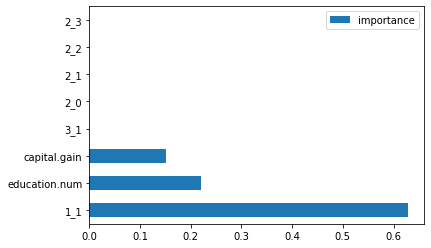

In [86]:
df_importance[:8].plot(kind='barh')

## 4.2.8 Bentuk Pohon

In [87]:
from sklearn.tree import plot_tree

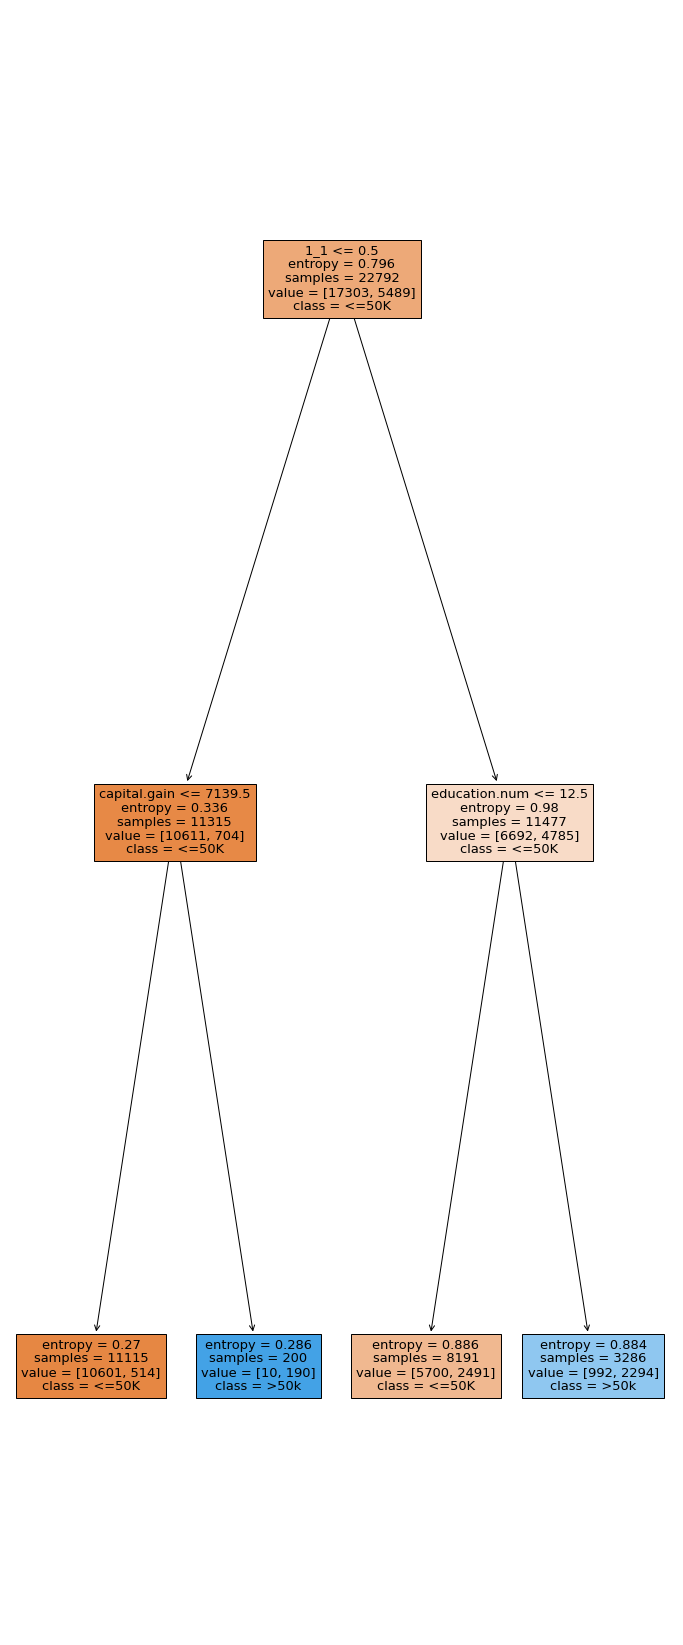

In [88]:
plt.figure(figsize=(12,30))
plot_tree(model, feature_names = features, filled=True, class_names = ['<=50K', '>50k'])

plt.show()